In [1]:
import numpy as np

from quara.objects.composite_system import CompositeSystem
from quara.objects.elemental_system import ElementalSystem
from quara.objects.matrix_basis import get_normalized_pauli_basis
from quara.objects.povm import (
    Povm,
    get_x_measurement,
    get_y_measurement,
    get_z_measurement,
)
from quara.objects.state import State, get_z0_1q
from quara.protocol.qtomography.standard.standard_qst import StandardQst
from quara.protocol.qtomography.standard.linear_estimator import LinearEstimator
from quara.protocol.qtomography.standard.projected_linear_estimator import (
    ProjectedLinearEstimator,
)

from quara.data_analysis import data_analysis, physicality_violation_check, report

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# setup system
e_sys = ElementalSystem(0, get_normalized_pauli_basis())
c_sys = CompositeSystem([e_sys])

povm_x = get_x_measurement(c_sys)
povm_y = get_y_measurement(c_sys)
povm_z = get_z_measurement(c_sys)
tester_objects = [povm_x, povm_y, povm_z]

In [4]:
true_object = get_z0_1q(c_sys)
num_data = [100, 1000]
n_rep = 100

case_name_list = [
    "LinearEstimator(True)",
    "LinearEstimator(False)",
    "ProjectedLinearEstimator(True)",
    "ProjectedLinearEstimator(False)",
]

qtomography_list = [
    StandardQst(tester_objects, on_para_eq_constraint=True),
    StandardQst(tester_objects, on_para_eq_constraint=False),
    StandardQst(tester_objects, on_para_eq_constraint=True),
    StandardQst(tester_objects, on_para_eq_constraint=False),
]
para_list = [True, False, True, False]

estimator_list = [
    LinearEstimator(),
    LinearEstimator(),
    ProjectedLinearEstimator(),
    ProjectedLinearEstimator(),
]

estimation_results_list = []

for i, name in enumerate(case_name_list):
    qtomography = qtomography_list[i]
    estimator = estimator_list[i]

    print(f"Case {i}: {name}")
    print(f"Parametorization: {para_list[i]}")
    print(f"Type of qtomography: {qtomography.__class__.__name__}")
    print(f"Estimator: {estimator.__class__.__name__}")

    estimation_results = data_analysis.estimate(
        qtomography=qtomography,
        true_object=true_object,
        num_data=num_data,
        estimator=estimator,
        iteration=n_rep,
    )
    estimation_results_list.append(estimation_results)

  7%|▋         | 7/100 [00:00<00:01, 69.88it/s]

Case 0: LinearEstimator(True)
Parametorization: True
Type of qtomography: StandardQst
Estimator: LinearEstimator


 10%|█         | 10/100 [00:00<00:00, 98.89it/s]

Case 1: LinearEstimator(False)
Parametorization: False
Type of qtomography: StandardQst
Estimator: LinearEstimator


  0%|          | 0/100 [00:00<?, ?it/s]/Users/tomoko/project/rcast/workspace/quara/quara/objects/state.py:283: ComplexWarning: Casting complex values to real discards the imaginary part
  np.array(vec_new, dtype=np.float64),
  3%|▎         | 3/100 [00:00<00:04, 21.09it/s]

Case 2: ProjectedLinearEstimator(True)
Parametorization: True
Type of qtomography: StandardQst
Estimator: ProjectedLinearEstimator


  3%|▎         | 3/100 [00:00<00:04, 21.13it/s]

Case 3: ProjectedLinearEstimator(False)
Parametorization: False
Type of qtomography: StandardQst
Estimator: ProjectedLinearEstimator


100%|██████████| 100/100 [00:04<00:00, 24.32it/s]


In [21]:
report.export_report(
    "sample_3.pdf",
    estimation_results_list,
    case_name_list,
    qtomography_list,
    para_list,
    estimator_list,
    true_object,
    tester_objects,
    num_data,
    n_rep,
    # save_materials=True
)

TypeError: 'povms' must be a list of Povm.Type of parameter passed: <class 'quara.objects.povm.Povm'>

In [19]:
!open sample_3.pdf

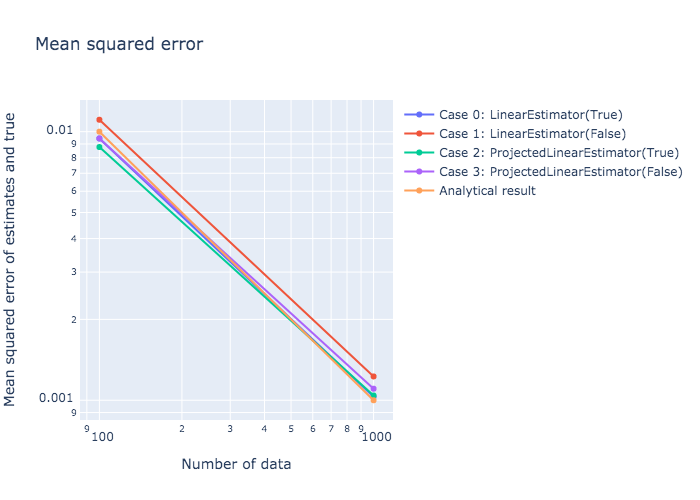

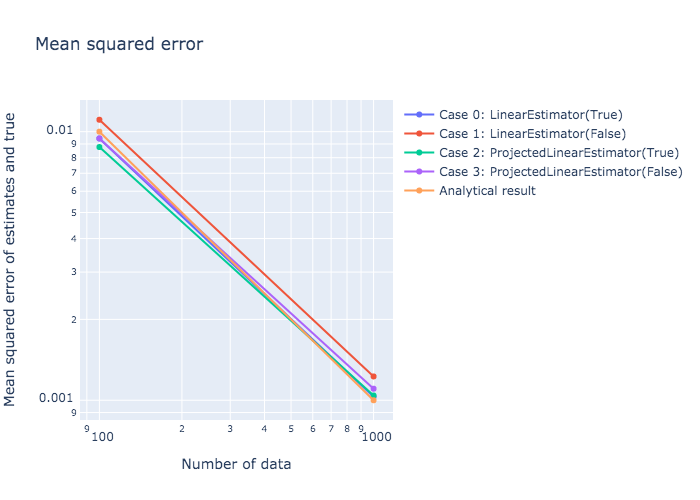